In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
stockprices = pd.read_csv("WIPRO.csv")
df=stockprices[['Date','Close']]

test_ratio = 0.2
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(df))
test_size = int(test_ratio * len(df))
print(f"train_size: {train_size}")
print(f"test_size: {test_size}")

train = df[:train_size][["Close"]]
test = df[train_size:][["Close"]]

train_size: 608
test_size: 152


In [4]:
def extract_seqX_outcomeY(data, N, offset):
    X, y = [], []

    for i in range(offset, len(data)):
        X.append(data[i - N : i])
        y.append(data[i])

    return np.array(X), np.array(y)

In [5]:
def calculate_rmse(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse

In [6]:
def calculate_mape(y_true, y_pred):
    y_pred, y_true = np.array(y_pred), np.array(y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [7]:
def calculate_perf_metrics(var):
    rmse = calculate_rmse(
        np.array(df[train_size:]["Close"]),
        np.array(df[train_size:][var]),
    )
    mape = calculate_mape(
        np.array(df[train_size:]["Close"]),
        np.array(df[train_size:][var]),
    )
    return rmse, mape

In [8]:
def plot_stock_trend(var, cur_title, stockprices=stockprices):
    ax = df[["Close", var, "200day"]].plot(figsize=(20, 10))
    plt.grid(False)
    plt.title(cur_title)
    plt.axis("tight")
    plt.ylabel("Stock Price ($)")

C:\Users\Diya\AppData\Local\Temp\ipykernel_24696\2488515121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[window_var] = df["Close"].rolling(window_size).mean()
C:\Users\Diya\AppData\Local\Temp\ipykernel_24696\2488515121.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["200day"] = df["Close"].rolling(200).mean()


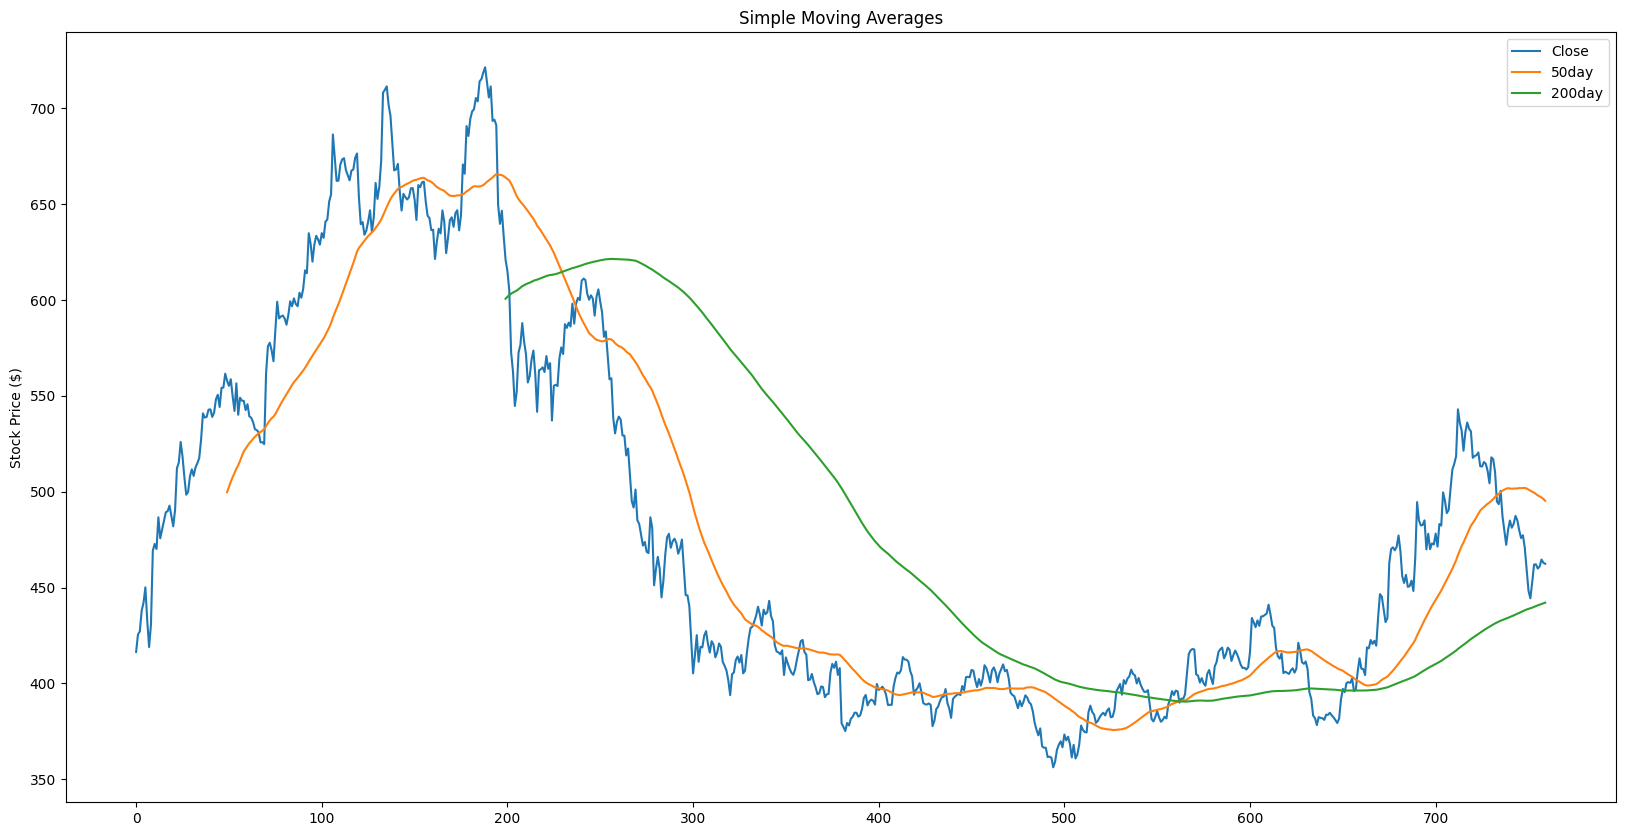

In [9]:
window_size = 50

window_var = f"{window_size}day"

df[window_var] = df["Close"].rolling(window_size).mean()

# Include a 200-day SMA for reference
df["200day"] = df["Close"].rolling(200).mean()

# Plot and performance metrics for SMA model
plot_stock_trend(var=window_var, cur_title="Simple Moving Averages")
rmse_sma, mape_sma = calculate_perf_metrics(var=window_var)

In [10]:
print(rmse_sma)
print(mape_sma)
#print("dfghj")

33.68612612866579
6.230429465276579


C:\Users\Diya\AppData\Local\Temp\ipykernel_24696\3446329111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[window_ema_var] = (
C:\Users\Diya\AppData\Local\Temp\ipykernel_24696\3446329111.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["200day"] = df["Close"].rolling(200).mean()


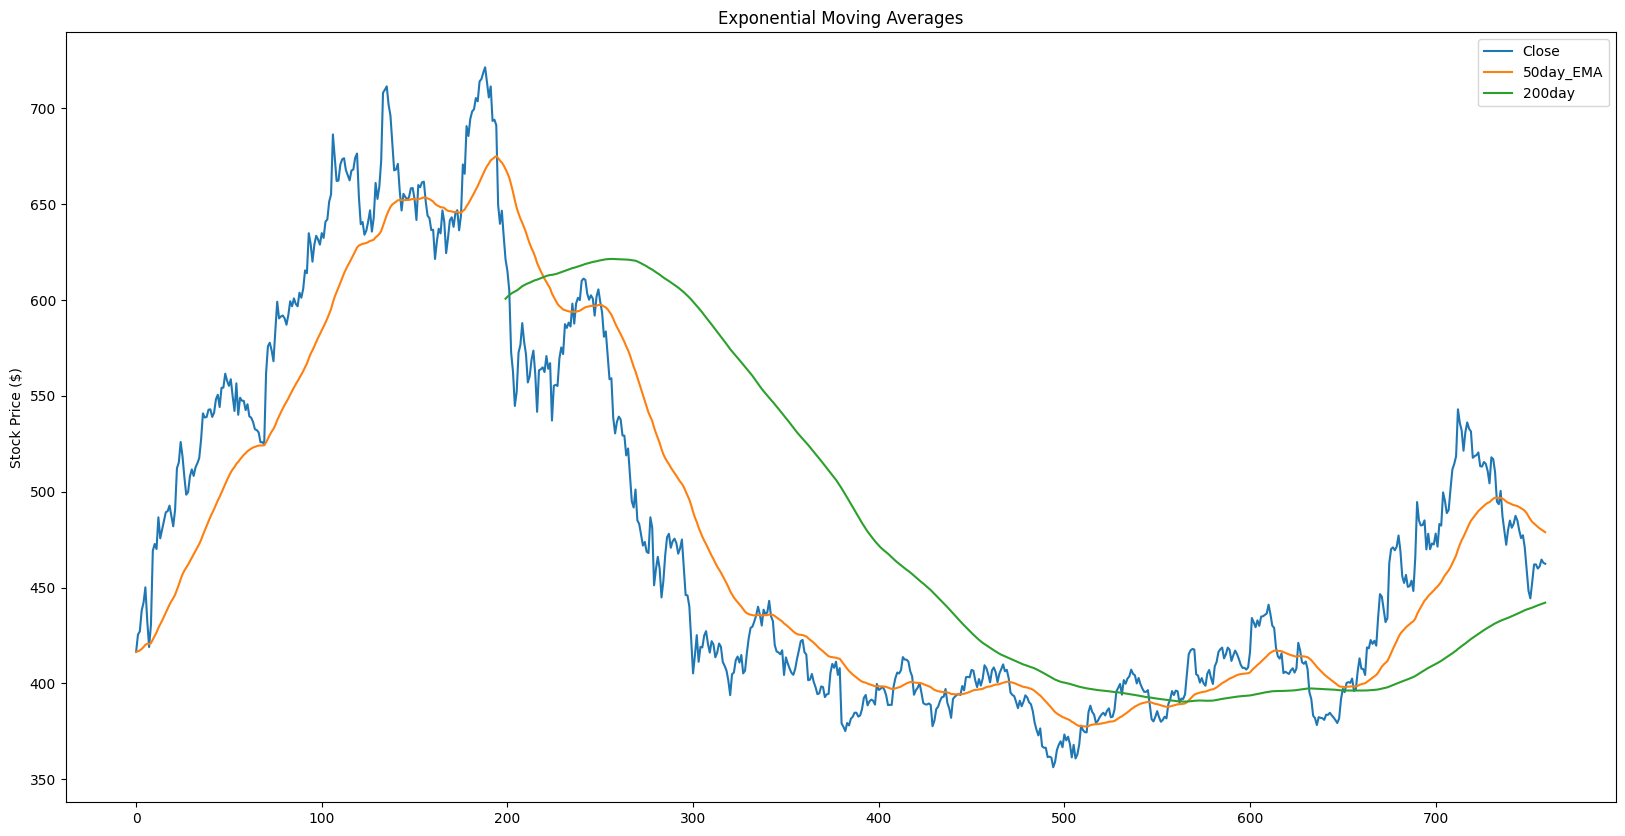

In [11]:
window_ema_var = f"{window_var}_EMA"

# Calculate the 50-day exponentially weighted moving average
df[window_ema_var] = (
    df["Close"].ewm(span=window_size, adjust=False).mean()
)
df["200day"] = df["Close"].rolling(200).mean()

# Plot and performance metrics for EMA model
plot_stock_trend(
    var=window_ema_var, cur_title="Exponential Moving Averages")
rmse_ema, mape_ema = calculate_perf_metrics(var=window_ema_var)

In [12]:
print(rmse_ema)
print(mape_ema)    # EMA performed better

27.68761455070334
4.931353878642991
